# Problem Set 4 by Manikanta Chunduru Balaji

This problem set is related to classification of CT scan images using Neural Networks

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import PIL
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [8]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/ps4_trainvalid_images.npy')
labels=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ps4_trainvalid_labels.csv')

In [22]:
data.shape

(13260, 64, 64, 1)

In [10]:
labeldata=pd.DataFrame(data=labels)
labeldata

,Id,Label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
13255,13255,1
13256,13256,1
13257,13257,0
13258,13258,2


In [11]:
labeldata['Label'].value_counts()

0    10506
1     2372
2      382
Name: Label, dtype: int64

In [14]:
from imblearn.under_sampling import RandomUnderSampler


rs = RandomUnderSampler(random_state=42)
X_rs, y_rs = rs.fit_resample(data.reshape(-1,64*64*1), labeldata['Label'])

X_rs.shape,y_rs.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((1146, 4096), (1146,))

In [18]:
from imblearn.over_sampling import SMOTE

smote=SMOTE('minority')
X_sm,y_sm=smote.fit_sample(data.reshape(-1,64*64),labeldata['Label'])

X_sm.shape,y_sm.shape


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((23384, 4096), (23384,))

In [23]:
data1=X_sm.reshape(-1,64,64,1)
data1.shape

(23384, 64, 64, 1)

In [26]:
label=pd.DataFrame(data=y_sm,columns=['Label'])
label['Label'].value_counts()

2    10506
0    10506
1     2372
Name: Label, dtype: int64

#Create Training, validation and Test Sets

In [50]:
#Create random indices
np.random.seed(42)
N=len(data1)

#split indices into train and validation sets
shuffled_indices = np.random.permutation(N)
train_indices=shuffled_indices[:int(N*0.6)]
valid_indices=shuffled_indices[int(N*0.6):int(N*0.8)]
test_indices=shuffled_indices[int(N*0.8):]

#split into train,validation and test sets
train_x= data1[train_indices]
valid_x= data1[valid_indices]
test_x= data1[test_indices]

# train_y=labeldata.iloc[train_indices]
# valid_y=labeldata.iloc[valid_indices]
# test_y=labeldata.iloc[test_indices]

train_y=y_sm[train_indices]
valid_y=y_sm[valid_indices]
test_y=y_sm[test_indices]

train_x.shape,valid_x.shape,test_x.shape,train_y.shape,valid_y.shape,test_y.shape

((14030, 64, 64, 1),
 (4677, 64, 64, 1),
 (4677, 64, 64, 1),
 (14030,),
 (4677,),
 (4677,))

In [51]:
#Pre processing the data to noramlize between 0 and 1
train_x=train_x.reshape(-1,64,64,1)/255.0
valid_x=valid_x.reshape(-1,64,64,1)/255.0
test_x=test_x.reshape(-1,64,64,1)/255.0
test_x.shape

(4677, 64, 64, 1)

# Visualizing the images

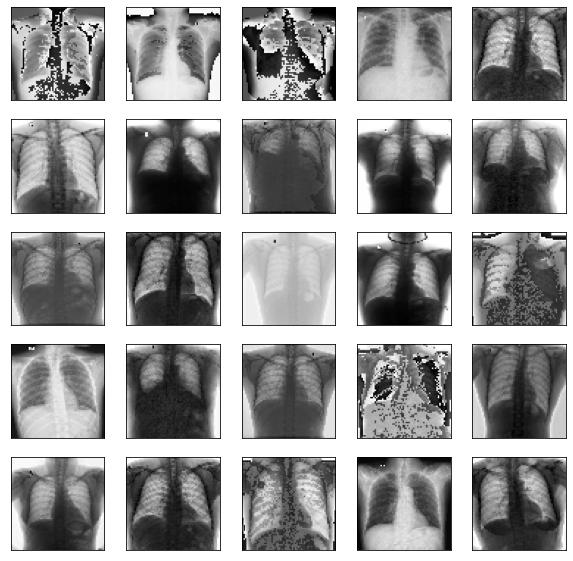

In [54]:
class_names=[0,1,2]

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow((tf.squeeze(train_x[i])),cmap=plt.cm.binary)
  #j=y_sm["Label"]
  #plt.xlabel(class_names[j[i]])
plt.show()

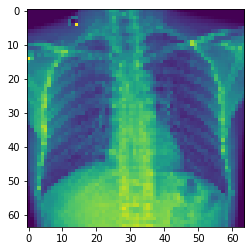

In [212]:
plt.imshow(tf.squeeze(train_x[5]))

In [56]:
#Regularization using early stopping
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 3,  
                                        restore_best_weights = True) 

# First Model using three layers

In [57]:
#Model
onelayer=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

onelayer.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)

onelayer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 524,803
Trainable params: 524,803
Non-trainable params: 0
_________________________________________________________________


In [59]:
#Train Model
onelayer.fit(train_x,train_y,epochs=25,validation_data=(valid_x,valid_y),callbacks=[earlystopping])

Epoch 1/25
439/439 [==============================] - 4s 8ms/step - loss: 1.0056 - accuracy: 0.6575 - val_loss: 0.5860 - val_accuracy: 0.7659
Epoch 2/25
439/439 [==============================] - 3s 8ms/step - loss: 0.6022 - accuracy: 0.7725 - val_loss: 0.5588 - val_accuracy: 0.7894
Epoch 3/25
439/439 [==============================] - 3s 7ms/step - loss: 0.5673 - accuracy: 0.7762 - val_loss: 0.5755 - val_accuracy: 0.7900
Epoch 4/25
439/439 [==============================] - 3s 7ms/step - loss: 0.5406 - accuracy: 0.7867 - val_loss: 0.5191 - val_accuracy: 0.7965
Epoch 5/25
439/439 [==============================] - 3s 7ms/step - loss: 0.5073 - accuracy: 0.8060 - val_loss: 0.4968 - val_accuracy: 0.8056
Epoch 6/25
439/439 [==============================] - 3s 7ms/step - loss: 0.5039 - accuracy: 0.8081 - val_loss: 0.4919 - val_accuracy: 0.8086
Epoch 7/25
439/439 [==============================] - 3s 7ms/step - loss: 0.5027 - accuracy: 0.8029 - val_loss: 0.4801 - val_accuracy: 0.8140
Epoch 

In [61]:
#Evaluation
test_loss,test_acc=onelayer.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc

147/147 - 0s - loss: 0.3975 - accuracy: 0.8443


(0.39746615290641785, 0.8443446755409241)

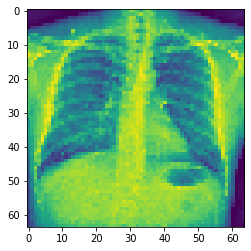

In [89]:
idx=6
plt.imshow(tf.squeeze(test_x[idx]))

In [90]:
pred=onelayer.predict(test_x[idx].reshape(-1,64,64,1))
pred

array([[9.9887925e-01, 7.1905379e-04, 4.0163717e-04]], dtype=float32)

In [91]:
np.argmax(pred),test_y[idx]

(0, 0)

In [215]:
ypred=onelayer.predict(test_x.reshape(-1,64,64,1))
ypreds=[]
for j in range(len(ypred)):
  k=np.argmax(ypred[j])
  ypreds.append(k)
#ROC AUC Score
labels=[0,1,2]
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

0.790359059974993

# Second model LENET-5

In [94]:
#Build Model
lenet5=tf.keras.Sequential([
      #first convolution
      tf.keras.layers.Conv2D(filters=20,kernel_size=(5,5),activation='relu',input_shape=(64,64,1)),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      #2nd convolution
      tf.keras.layers.Conv2D(filters=50,kernel_size=(5,5),activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      #Dense
      tf.keras.layers.Flatten(input_shape=(64,64,1)),
      tf.keras.layers.Dense(500,activation='relu'),
      tf.keras.layers.Dense(3,activation='softmax')

])

lenet5.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)

lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               4225500   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [199]:
#Train Model
hist=lenet5.fit(train_x,train_y,epochs=15,validation_data=(valid_x,valid_y),callbacks=[earlystopping])

Epoch 1/15
439/439 [==============================] - 107s 244ms/step - loss: 0.1191 - accuracy: 0.9549 - val_loss: 0.1993 - val_accuracy: 0.9305
Epoch 2/15
439/439 [==============================] - 111s 253ms/step - loss: 0.0903 - accuracy: 0.9669 - val_loss: 0.1787 - val_accuracy: 0.9401
Epoch 3/15
439/439 [==============================] - 109s 248ms/step - loss: 0.0766 - accuracy: 0.9717 - val_loss: 0.1840 - val_accuracy: 0.9395
Epoch 4/15
439/439 [==============================] - 108s 247ms/step - loss: 0.0593 - accuracy: 0.9776 - val_loss: 0.1870 - val_accuracy: 0.9459
Epoch 5/15
439/439 [==============================] - 111s 253ms/step - loss: 0.0498 - accuracy: 0.9823 - val_loss: 0.2305 - val_accuracy: 0.9335


In [200]:
#Evaluation
test_loss,test_acc=lenet5.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc

147/147 - 8s - loss: 0.1871 - accuracy: 0.9393


(0.18712744116783142, 0.9392772912979126)

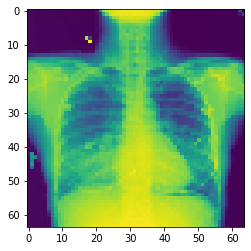

In [202]:
idx=3
plt.imshow(tf.squeeze(test_x[idx]))

In [203]:
pred=lenet5.predict(test_x[idx].reshape(-1,64,64,1))
pred

array([[9.9998736e-01, 1.2631882e-05, 7.4099074e-11]], dtype=float32)

In [204]:
np.argmax(pred),test_y[idx]

(0, 0)

In [205]:
ypred=lenet5.predict(test_x.reshape(-1,64,64,1))
ypreds=[]
for j in range(len(ypred)):
  k=np.argmax(ypred[j])
  ypreds.append(k)

In [209]:
#ROC AUC Score
labels=[0,1,2]
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')


0.9277147434307261

Text(0.5, 0, 'epoch')

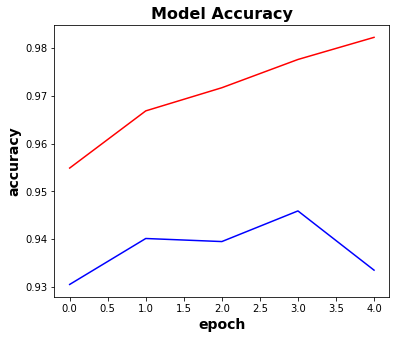

In [207]:
plt.figure(figsize=(6, 5))
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)

# Defining Data Augmentation

In [187]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

# VGG

In [135]:
#Build Model
#vgg.load_weights('/content/vgg_4Laywithdropout.h5')
vgg=tf.keras.Sequential([

      #first convolution
      tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same',input_shape=(64,64,1)),
      #data_augmentation,
      tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      #2nd convolution
      tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),

      #3rd convolution
      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      
      #Dense
      tf.keras.layers.Flatten(input_shape=(64,64,1)),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(3,activation='softmax')

])
#learning_rate = 0.001
vgg.compile(   
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)

vgg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)      

In [137]:
#Train Model
history=vgg.fit(train_x,train_y,epochs=25,validation_data=(valid_x,valid_y),callbacks=[earlystopping])

Epoch 1/25
439/439 [==============================] - 406s 923ms/step - loss: 0.6300 - accuracy: 0.7184 - val_loss: 0.3829 - val_accuracy: 0.8448
Epoch 2/25
439/439 [==============================] - 399s 908ms/step - loss: 0.3572 - accuracy: 0.8537 - val_loss: 0.2780 - val_accuracy: 0.8837
Epoch 3/25
439/439 [==============================] - 405s 922ms/step - loss: 0.2785 - accuracy: 0.8877 - val_loss: 0.2510 - val_accuracy: 0.9042
Epoch 4/25
439/439 [==============================] - 401s 914ms/step - loss: 0.2127 - accuracy: 0.9150 - val_loss: 0.2255 - val_accuracy: 0.9126
Epoch 5/25
439/439 [==============================] - 401s 913ms/step - loss: 0.1708 - accuracy: 0.9345 - val_loss: 0.2062 - val_accuracy: 0.9235
Epoch 6/25
439/439 [==============================] - 407s 926ms/step - loss: 0.1345 - accuracy: 0.9496 - val_loss: 0.2233 - val_accuracy: 0.9239
Epoch 7/25
439/439 [==============================] - 404s 921ms/step - loss: 0.0923 - accuracy: 0.9635 - val_loss: 0.2023 -

In [139]:
#Evaluation
test_loss,test_acc=vgg.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc

147/147 - 30s - loss: 0.2255 - accuracy: 0.9339


(0.22545018792152405, 0.9339320063591003)

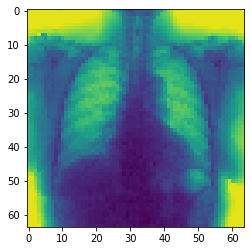

In [157]:
idx=5
plt.imshow(tf.squeeze(test_x[idx]))

In [158]:
pred=vgg.predict(test_x[idx].reshape(-1,64,64,1))
pred

array([[0.07961991, 0.7126613 , 0.20771872]], dtype=float32)

In [159]:
#Prediction based on index
np.argmax(pred),test_y[idx]

(1, 1)

In [156]:
test_y[0:25]

array([0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 2, 2])

In [160]:
ypred=vgg.predict(test_x.reshape(-1,64,64,1))
ypreds=[]
for j in range(len(ypred)):
  k=np.argmax(ypred[j])
  ypreds.append(k)

In [161]:
len(ypreds)

4677

Model evaluation

In [162]:
#ROC AUC Score
labels=[0,1,2]
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

0.9197658388669226

In [180]:
#Confusion Matrix
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test,y_pred)

array([[[2469,  112],
        [ 115, 1981]],

       [[4095,  140],
        [ 132,  310]],

       [[2481,   57],
        [  62, 2077]]])

Text(0.5, 0, 'epoch')

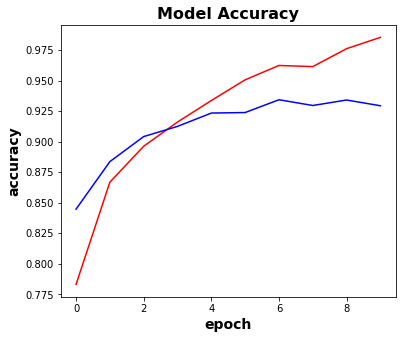

In [176]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)

Text(0.5, 0, 'epoch')

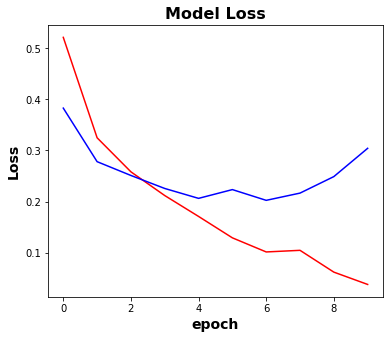

In [220]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss', weight='bold', fontsize=16)
plt.ylabel('Loss', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)

#VGG with Augmentation

In [188]:
#VGG with data augmentation
vgg_1=tf.keras.Sequential([

      #first convolution
      data_augmentation,
      tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same',input_shape=(64,64,1)),
      tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      #2nd convolution
      tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      #tf.keras.layers.Dropout(0.5),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),

      #3rd convolution
      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      #tf.keras.layers.Dropout(0.5),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      #Dense
      tf.keras.layers.Flatten(input_shape=(64,64,1)),
      tf.keras.layers.Dense(512,activation='relu'),
      #tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3,activation='softmax')

])

vgg_1.compile(   
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)



In [190]:
history1=vgg_1.fit(train_x,train_y,epochs=15,validation_data=(valid_x,valid_y),callbacks=[earlystopping])

Epoch 1/15
439/439 [==============================] - 416s 945ms/step - loss: 0.7697 - accuracy: 0.6414 - val_loss: 0.9208 - val_accuracy: 0.6564
Epoch 2/15
439/439 [==============================] - 409s 932ms/step - loss: 0.6239 - accuracy: 0.7442 - val_loss: 0.6276 - val_accuracy: 0.7490
Epoch 3/15
439/439 [==============================] - 420s 957ms/step - loss: 0.5779 - accuracy: 0.7628 - val_loss: 1.4479 - val_accuracy: 0.6245
Epoch 4/15
439/439 [==============================] - 430s 979ms/step - loss: 0.5728 - accuracy: 0.7577 - val_loss: 0.8928 - val_accuracy: 0.7131
Epoch 5/15
439/439 [==============================] - 438s 997ms/step - loss: 0.5251 - accuracy: 0.7811 - val_loss: 0.8062 - val_accuracy: 0.7231


In [192]:
#Evaluation
test_loss,test_acc=vgg_1.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc


147/147 - 30s - loss: 0.6417 - accuracy: 0.7413


(0.641665518283844, 0.7412871718406677)

In [211]:
ypred=vgg_1.predict(test_x.reshape(-1,64,64,1))
ypreds=[]
for j in range(len(ypred)):
  k=np.argmax(ypred[j])
  ypreds.append(k)
#ROC AUC Score
labels=[0,1,2]
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

0.7057745322097958

In [214]:
vgg_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)       

In [216]:
#VGG with data augmentation and dropout
vgg_2=tf.keras.Sequential([

      #first convolution
      data_augmentation,
      tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same',input_shape=(64,64,1)),
      tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      #2nd convolution
      tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      #tf.keras.layers.Dropout(0.5),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),

      #3rd convolution
      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
      #tf.keras.layers.Dropout(0.5),
      tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid'),
      #Dense
      tf.keras.layers.Flatten(input_shape=(64,64,1)),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3,activation='softmax')

])

vgg_2.compile(   
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)


In [217]:
history2=vgg_2.fit(train_x,train_y,epochs=15,validation_data=(valid_x,valid_y),callbacks=[earlystopping])

Epoch 1/15
439/439 [==============================] - 417s 947ms/step - loss: 0.7781 - accuracy: 0.6362 - val_loss: 0.7257 - val_accuracy: 0.6874
Epoch 2/15
439/439 [==============================] - 418s 951ms/step - loss: 0.6269 - accuracy: 0.7583 - val_loss: 0.7067 - val_accuracy: 0.7240
Epoch 3/15
439/439 [==============================] - 414s 944ms/step - loss: 0.6259 - accuracy: 0.7505 - val_loss: 1.9978 - val_accuracy: 0.5420
Epoch 4/15
439/439 [==============================] - 422s 962ms/step - loss: 0.5756 - accuracy: 0.7760 - val_loss: 0.6353 - val_accuracy: 0.7496
Epoch 5/15
439/439 [==============================] - 443s 1s/step - loss: 0.5180 - accuracy: 0.7883 - val_loss: 0.8243 - val_accuracy: 0.7052
Epoch 6/15
439/439 [==============================] - 406s 926ms/step - loss: 0.4563 - accuracy: 0.8098 - val_loss: 0.6029 - val_accuracy: 0.7994
Epoch 7/15
439/439 [==============================] - 407s 927ms/step - loss: 0.4467 - accuracy: 0.8071 - val_loss: 0.7264 - va

In [219]:
#Evaluation
test_loss,test_acc=vgg_2.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc

147/147 - 30s - loss: 0.5642 - accuracy: 0.8127


(0.5641714930534363, 0.8127004504203796)

In [218]:
ypred=vgg_2.predict(test_x.reshape(-1,64,64,1))
ypreds=[]
for j in range(len(ypred)):
  k=np.argmax(ypred[j])
  ypreds.append(k)
#ROC AUC Score
labels=[0,1,2]
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

0.7591157194496608